## Feature Transformation and Applied ML 

In [1]:
import numpy as np 
import math 
import pandas as pd
from itertools import combinations_with_replacement
import matplotlib . pyplot as plt
import statistics
import ml_helpers as ml 

### 1. Data Prep

In [2]:
pd.set_option('display.max_rows', 5000)
data = pd.read_csv('merged_county_data.csv')
print(data.shape)

(1416, 266)


In [3]:
#Checking columns for nas
data.isna().sum()

Unnamed: 0                                         0
County_x                                           0
State_x                                            0
GEO_ID                                             0
Total Population                                   0
Minority Population                                0
ratio_income_poverty (above 200% FPL)              0
Total Bachelors Degree                             0
Est Speak English Less than Well                   0
Per Capita Income                                  0
Est Civilians Insured                              0
Est Percent Civilians Insured                      0
Percent Households without Vehicle                 0
Household Level - More People than Rooms (%)       0
acs_county_code                                    0
FIPS                                               0
State_y                                            0
County_y                                           0
Deaths                                        

In [4]:
cols_to_drop = [
    'Unnamed: 0',                                      
    'acs_county_code',                                 
    'FIPS',                                            
    '95% CI - Low',                                    
    '95% CI - High',                                   
    'Quartile',                                        
    '95% CI - Low.1',                                  
    '95% CI - High.1',                                 
    'Quartile.1',                                      
    '95% CI - Low.2',                                  
    '95% CI - High.2',                                 
    'Quartile.2',                                      
    '95% CI - Low.3',                                  
    '95% CI - High.3',                                 
    'Quartile.3',                                      
    '95% CI - Low.4',                                  
    '95% CI - High.4',                                 
    'Quartile.4',                                      
    '95% CI - Low.5',                                  
    '95% CI - High.5',                                 
    'Quartile.5',                                      
    '95% CI - Low.6',                              
    '95% CI - High.6',                                 
    'Quartile.6',                                      
    'Quartile.7',                                      
    '95% CI - Low.7',                                  
    '95% CI - High.7',                                 
    'Quartile.8',                                      
    'Quartile.9',                                      
    '95% CI - Low.8',                                  
    '95% CI - High.8',                                 
    'Quartile.10',                                     
    '95% CI - Low.9',                                  
    '95% CI - High.9',                                 
    'Quartile.11',                                     
    'Quartile.12',                                     
    '95% CI - Low.10',                                 
    '95% CI - High.10',                                
    'Quartile.13',                                     
    '95% CI - Low.11',                                 
    '95% CI - High.11',                                
    'Quartile.14',                                     
    'Quartile.15',                                     
    'Quartile.16',                                     
    'Quartile.17',                                         
    'Quartile.18',                                     
    'Quartile.19',                                     
    'Quartile.20',                                     
    'Quartile.21',                                     
    'Quartile.22',                                     
    'Quartile.23',                                     
    '95% CI - Low.13',                                 
    '95% CI - High.13',                                
    'Quartile.24',                                     
    '80th Percentile Income',                          
    '20th Percentile Income',                          
    'Quartile.25',                                     
    '95% CI - Low.14',                                 
    '95% CI - High.14',                                
    'Quartile.26',                                     
    'Quartile.27',                                     
    'Quartile.28',                                     
    '95% CI - Low.15',                                 
    '95% CI - High.15',                                
    'Quartile.29',                                     
    'Quartile.30',                                     
    'Quartile.31',                                     
    '95% CI - Low.16',                                 
    '95% CI - High.16',                                
    'Quartile.32',                                     
    '95% CI - Low.17',                                 
    '95% CI - High.17',                                
    'Quartile.33',                                     
    '95% CI - Low.18',                                 
    '95% CI - High.18',                                
    'Quartile.34',                                     
    'FIPS County Code',                                
    'new_FIPS',                                             
]

In [5]:
#Dropping columns that are not pertinent or contain a lot of nas 
columns = list(data)
cleaned_data = data.copy(deep=True)

for c in columns:
    if data[c].dtypes == 'object':
        cols_to_drop.append(c)
    if data[c].isna().sum() > 5:
        cols_to_drop.append(c)

print(len(cols_to_drop))
cleaned_data = data.drop(cols_to_drop, axis=1)

cleaned_data = cleaned_data.dropna()
print(cleaned_data.shape)

202
(1396, 68)


### 2. Splitting the Data Randomly and by State

In [6]:
#ca_set generated for state-level cross validation
ca_set = cleaned_data.loc[cleaned_data['state_code'] == 6]
ca_set_labels = ca_set[['Deaths involving COVID-19']]
ca_set_features = ca_set.drop('Deaths involving COVID-19', axis=1)


In [7]:
#nonca_set generated for state-level cross validation
nonca_set = cleaned_data.loc[data['state_code'] != 6]
nonca_set_labels = nonca_set[['Deaths involving COVID-19']]
nonca_set_features = nonca_set.drop('Deaths involving COVID-19', axis=1)

In [8]:
# create np version of X and y datasets from final data set for functions 
np_cleaned_data = cleaned_data.to_numpy(dtype=float)

# column index for 'Deaths involving COVID-19' will change based on which cleaned data set is used/which
# columns are dropped
y = np_cleaned_data[:,65]
y = y.reshape(y.shape[0],-1)
X = np.delete(np_cleaned_data,65,1)
print(X.shape)
print(y.shape)

(1396, 67)
(1396, 1)


In [9]:
#Random Split of the dataset 
X_train, X_test, y_train, y_test = ml.train_test_split(X, y, train_ratio=0.75)

### 3. Applying Machine Learning Models to the Data 

In [11]:
#Applying linear regression with cross validation 

model_func = ml.ls_linear_reg
test_func = ml.ls_linear_reg_predict
k_list = [3, 4, 5, 6, 7, 8, 9, 10]
for k in k_list:
    best_w, cv_err = ml.K_folds_cross_validation(X_train, X_test, y_train, y_test, model_func, test_func, folds=k, param=None)
    print(cv_err)

30991.59613195624
33385.09818070058
32679.582374345944
33243.5624862163
32914.209734754615
33060.73265498797
32429.51780076548
32957.071857257695


In [12]:
#Applying Linear Regression with cross validation and different train-test splits

tt_results = []
for t in range(0,101):
    best_error = float('inf')
    X_train, X_test, y_train, y_test = ml.train_test_split(X, y, train_ratio=0.75)
    best_w, cv_err = ml.K_folds_cross_validation(X_train, X_test, y_train, y_test, model_func, test_func, folds=k, param=None)  
    if cv_err < best_error:
        best_error = cv_err
    tt_results.append(best_error)
    

In [13]:
print(statistics.median(tt_results))
print(statistics.mean(tt_results))

31588.165148538028
47305.191098119205


In [14]:
def createlist(r1,r2):
    return[i for i in range(r1,r2+1)]

list100 = createlist(0,100)

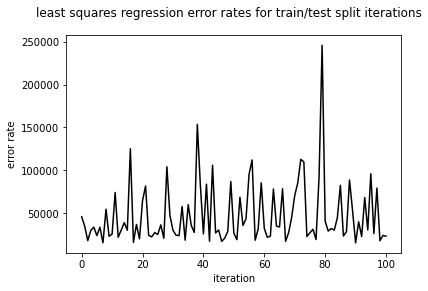

In [15]:
#Plotting linear regression cross-validation iterations with different train-test splits
plt.plot(list100,tt_results,c='black')
plt.ylabel('error rate')
plt.xlabel('iteration')
plt.suptitle('least squares regression error rates for train/test split iterations')
plt.show()

In [16]:
#State Specific Cross Validation
best_w, error = ml.by_states_cross_validation(nonca_set, ca_set_labels, ca_set_features, ml.ls_linear_reg, ml.mean_squared_error)

The error is  15671005526.374313
old best err: inf; new best err 15671005526.374313
The error is  161075906614.82074
The error is  22538901478.630257
The error is  93999451234.5523
The error is  3594385717609.2744
The error is  241302790290.0989
The error is  778998254804.5043
The error is  167930732980.61407
The error is  2023795560512.8108
The error is  210457604513.4703
The error is  22531672209.196533
The error is  291362852776.10223
The error is  220077531380.81238
The error is  1265948397112.8352
The error is  942590768555.4277
The error is  87053000504.69801
The error is  153345963216.81583
The error is  21751250627.05762
The error is  1157599239994.179
The error is  141485724795.99194
The error is  12050315984.739386
old best err: 15671005526.374313; new best err 12050315984.739386
The error is  66629147711.03541
The error is  4780195919097.099
The error is  35475516235.78586
The error is  127553462798.51794
The error is  340904864665.4859
The error is  487525414633.1014
The er

In [26]:
p = [0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]

# for pvalue in p:
#     l, m = ml.by_states_cross_validation(nonca_set, ca_set_labels, ca_set_features, ml.ridge_regression, ml.mean_squared_error, p)


In [18]:
### Applying Standard Ridge Regression across different parameters 
param_list = [0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]

for p in param_list:
    error, best_w = ml.ridge_regression(X_train, X_test, y_train, y_test, p)
    print(error) 


22692.225590037007
22697.388931845802
22715.2138525664
22733.152599921534
22822.832586243476
22904.572999578875
23312.990512496897
23546.28205238904


In [19]:
#Applying ridge regression with cross validation and different parameters 

model_func = ml.ridge_regression
test_func = ml.ridge_regression_predict
k_list = [3, 4, 5, 6, 7, 8, 9, 10]
param = [0.8]
for k in k_list:
    for pvalue in param:
        best_w, error = ml.K_folds_cross_validation(X_train, X_test, y_train, y_test, model_func, test_func, folds=k, param=pvalue)
        print(error)

23994.65060631732
23530.140780350226
23491.626119821638
23991.45207431247
23906.515693610912
23782.654738759553
22844.725669825086
22921.353757697092


In [20]:
#Applying cross validation ridge iterations with different train test splits 

tt_ridge_results = []
for t in range(0,101):
    best_error = float('inf')
    X_train, X_test, y_train, y_test = ml.train_test_split(X, y, train_ratio=0.75)
    best_w, error = ml.K_folds_cross_validation(X_train, X_test, y_train, y_test, model_func, test_func, folds=5, param=0.8)  
    if error < best_error:
        best_error = error
    tt_ridge_results.append(best_error)
    
print(tt_ridge_results)
            


[60690.12218320141, 15457.643421326617, 23992.74512903166, 43456.958394092704, 24890.091494160857, 30711.357700504617, 109157.5740683719, 77142.78825829121, 23818.743803376427, 16973.87329721079, 23134.201507448393, 16585.802582529934, 105119.65908991535, 55493.592844445164, 40408.30577821408, 138322.83913011028, 30851.798893086216, 36001.03401667611, 55847.35038460268, 52384.8927329255, 21697.514032721905, 25548.746849267907, 37147.321461988526, 81644.86388894798, 65979.34388840609, 31576.315668115818, 23259.63594385874, 25312.776573866362, 21030.082605003176, 187239.177770245, 30392.48919912487, 26353.00882307624, 71103.76988080006, 59924.15834087874, 38063.92767483718, 149217.2944697508, 30073.700323682166, 84142.74002071536, 27951.036560155328, 14688.187404377135, 20919.39149902184, 34504.41934082056, 45625.507533475706, 41169.02372262015, 32490.527249592444, 42371.511874691154, 40738.51474105541, 15464.02231438329, 20273.551206847656, 16335.214628707485, 118604.87494606772, 25002.

In [21]:
print(statistics.median(tt_ridge_results))
print(statistics.mean(tt_ridge_results))

34504.41934082056
54543.30449800122


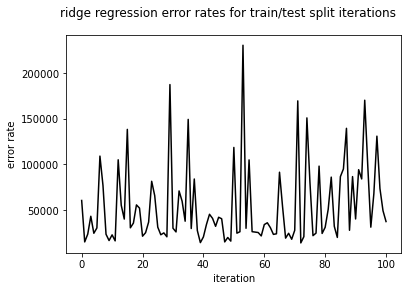

In [22]:
#Plotting ridge regression cross-vali iterations with different train-test splits
plt.plot(list100,tt_ridge_results,c='black')
plt.ylabel('error rate')
plt.xlabel('iteration')
plt.suptitle('ridge regression error rates for train/test split iterations')
plt.show()

In [23]:
#Running Through the Grid Search with ridge regression 

params = [0, 0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 1,100,1000,5000]
model_func = ml.ridge_regression
test_func = ml.ridge_regression_predict

error, best_w, best_param = ml.param_search(X_train, X_test, 
                                            y_train, y_test, model_func, 
                                            test_func, params, 
                                            cv_func=None, folds=None)
print(error)
print(best_w)
print(best_param)

for param 0, the error is 39099.08477142906
for param 1e-05, the error is 39099.06513577629
for param 5e-05, the error is 39098.98630683099
for param 0.0001, the error is 39098.88713010954
for param 0.0005, the error is 39098.06880842346
for param 0.001, the error is 39096.98694950028
for param 0.005, the error is 39086.53251487242
for param 1, the error is 38872.94151572408
for param 100, the error is 38936.32489486284
for param 1000, the error is 38713.30197231858
for param 5000, the error is 39016.20513007429
38713.30197231858
[[ 8.73345687e-02]
 [-2.52995788e-03]
 [-8.15143782e-04]
 [ 3.16934972e-03]
 [-1.84303375e-03]
 [-4.73985644e-04]
 [ 6.61226126e-04]
 [ 1.50416252e-03]
 [ 2.24401416e+00]
 [ 7.15129909e-01]
 [ 1.58460956e-02]
 [-1.56059687e-01]
 [ 7.78329277e-03]
 [ 4.77806482e+00]
 [-2.31151384e-02]
 [-2.03431310e+00]
 [ 4.92891089e+00]
 [-3.19061698e+00]
 [ 1.97242919e-01]
 [ 1.00283844e+00]
 [ 3.57804291e+00]
 [ 2.36325265e-01]
 [-1.86194855e-01]
 [-2.16109362e+00]
 [ 7.622

In [24]:
#Sample call to polynomial param search with cross val function 
poly_x_train = ml.polynomial_expansion(X_train, 2)
poly_x_test = ml.polynomial_expansion(X_test, 2)
param_err, param_w, best_param = ml.param_search(poly_x_train, poly_x_test, y_train, y_test,
                                               ml.ridge_regression, ml.ridge_regression_predict,
                                               params=[0.01, 0.1, 0.25, 0.5, 0.7, 0.9, 1], 
                                               cv_func=None)

for param 0.01, the error is 9212983.663141863
for param 0.1, the error is 9212983.834035506
for param 0.25, the error is 9212984.11907099
for param 0.5, the error is 9212984.593997998
for param 0.7, the error is 9212984.97383989
for param 0.9, the error is 9212985.353759335
for param 1, the error is 9212985.543748146
